In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import pickle

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

root_dir = os.getcwd() + "\\data\\reorganized"
categories = os.listdir(root_dir)
width = 224
height = 224
dim = (width, height)
data = []


In [29]:
def make_data():
    for category in categories:
        path = os.path.join(root_dir, category)
        label = categories.index(category)

        for img_name in os.listdir(path):
            image_path = os.path.join(path, img_name)
            image = cv2.imread(image_path)

            try:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, dim)
                image = np.array(image, dtype=np.float32)
                data.append([image, label])
            except Exception as e:
                pass

    pik = open('pickle/ham10000classifier.pickle', 'wb')
    pickle.dump(data, pik)
    pik.close()

In [30]:
# make_data()

In [3]:
def load_data():
    pick = open('pickle/ham10000classifier.pickle', 'rb')
    data = pickle.load(pick)
    pick.close()

    feature = []
    labels = []

    for img, label in data:
        feature.append(img)
        labels.append(label)

    feature = np.array(feature, dtype=np.float32)
    labels = np.array(labels)
    feature = feature / 255.0
    return [feature, labels]

In [4]:
(feature, labels) = load_data()

In [5]:
from ModelResNet import create_model
from tensorflow.keras.optimizers import Adam

lr = 0.0001
model = create_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=lr),
              metrics=['acc'])

------------------------------------------------------------------------
Training for fold 1 ...
1/1 [==============================] - 25s 25s/step - loss: 1.6106 - acc: 0.0000e+00 - val_loss: 1.6095 - val_acc: 0.1872
Score for fold 1: loss of 1.6095407009124756; acc of 18.715596199035645%


d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


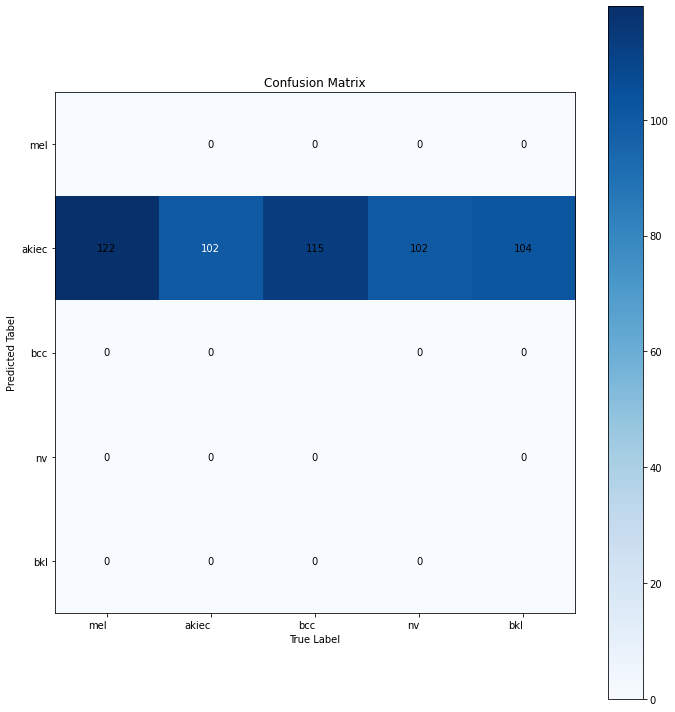

d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.19      1.00      0.32       102
           2       0.00      0.00      0.00       115
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00       104

    accuracy                           0.19       545
   macro avg       0.04      0.20      0.06       545
weighted avg       0.04      0.19      0.06       545

------------------------------------------------------------------------
Training for fold 2 ...
1/1 [==============================] - 6s 6s/step - loss: 1.6078 - acc: 1.0000 - val_loss: 1.6095 - val_acc: 0.2000
Score for fold 2: loss of 1.6094893217086792; acc of 20.000000298023224%


ResourceExhaustedError:  OOM when allocating tensor with shape[30,256,56,56] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/conv2_block1_3_bn/FusedBatchNormV3 (defined at D:\PythonProject\HAMClassification\KFoldTrain.py:35) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_41249]

Function call stack:
predict_function


In [6]:
inputs = feature
targets = labels
fold_no = 1

from KFoldTrain import KFoldtrain

KFoldtrain(num_folds=3,inputs=feature,targets=labels,model=model,categories=categories)
